# Generate field-of-view tiles around selected centers

by Pu Zheng

2023.08.13

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

camera_sizes = [2304, 2304]
pixel_size = 0.107 # um
tile_sizes = np.round(np.array(camera_sizes) * pixel_size * 0.9)

## Load parameters

In [43]:
data_folder = r'E:\Data\20230810-4T1preEdit-0725_MEAA0729'
local_center_filename = 'local_centers.txt'
local_centers = pd.read_csv(os.path.join(data_folder, local_center_filename), header=None, names=['X','Y'])

In [44]:
def generate_tiles_from_center(center, dims=[3,3], sizes=tile_sizes):
    """Function to generate a snake-like tile list given center coordinates"""
    dim_x, dim_y = dims
    size_x, size_y = sizes
    # indices of positions
    pos_indices = np.indices([dim_x,dim_y]) - np.array([float(dim_x-1)/2,float(dim_y-1)/2])[:,np.newaxis,np.newaxis]
    # calculate positions
    positions = pos_indices * sizes[:,np.newaxis,np.newaxis] + np.round(center)[:,np.newaxis,np.newaxis]
    # sort position
    sorted_positions = np.zeros([dim_x*dim_y, 2])
    for i in range(dim_x):
        if not i%2:
            sorted_positions[i*dim_y:(i+1)*dim_y,:] = positions[:,i].transpose()
        else:
            sorted_positions[i*dim_y:(i+1)*dim_y,:] = np.fliplr(positions[:,i]).transpose()
    sorted_positions = np.round(sorted_positions, 1)
    return sorted_positions

In [57]:
all_positions = []
tile_dims = [3,3]
add_intermediate_frame = False
for _i, _row in local_centers.iterrows():
    _tiles = generate_tiles_from_center(_row.values, tile_dims)
    all_positions.append(_tiles)


final_positions = []

if add_intermediate_frame:    
    for _j in range(len(all_positions)):
        _mid_center = (all_positions[_j][-1] + all_positions[(_j+1)%len(all_positions)][0]) / 2
        final_positions.extend(list(all_positions[_j]))
        final_positions.append(_mid_center)
    final_positions = np.array(final_positions)
else:
    final_positions = np.concatenate(all_positions)

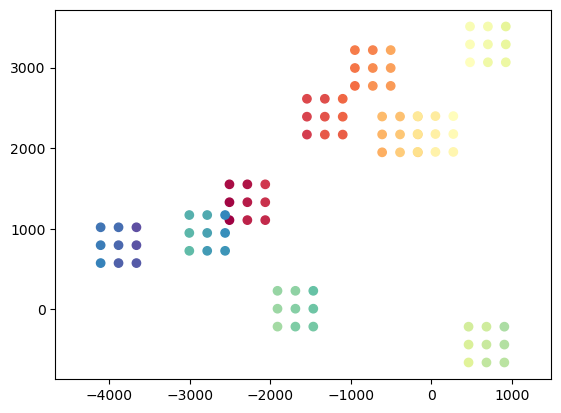

In [58]:
plt.figure()
plt.scatter(final_positions[:,0], final_positions[:,1],#'o-', 
            c=np.arange(len(final_positions)), cmap='Spectral')
plt.axis('equal')
plt.show()

In [63]:
# write into a file
fl = os.path.join(data_folder, 'positions_all.txt')

f = open(fl,'w')
for _x, _y in final_positions:
    f.write(f"{_x:.1f}, {_y:.1f}\n")
f.close()